In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumGothic')

In [ ]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
[f for f in font_list if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf']

In [ ]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

# matplotlib 설정
plt.rc('font', family='NanumGothic')

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/[아이펠] 리서치과정 10기/DLThon/data/AIHub/final_dataset/archive/final_data_preprocessed_241207.csv")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   idx           4960 non-null   int64 
 1   class         4960 non-null   object
 2   conversation  4960 non-null   object
dtypes: int64(1), object(2)
memory usage: 116.4+ KB


In [ ]:
train_data = train_data.loc[train_data['class']!='일반 대화']
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가? 아닙니다. 죄송합니다. 죽을 거면 혼...
1,1,협박 대화,길동 경찰서입니다. 9시 40분 마트에 폭발물을 설치할 거다. 네? 똑바로 들어 한...
2,2,기타 괴롭힘 대화,너 되게 귀여운 거 알지? 나보다 작은 남자는 첨 봤어. 그만해. 너희들 놀리는 거...
3,3,갈취 대화,어이 거기 예? 너 말이야 너. 이리 오라고 무슨 일. 너 옷 좋아 보인다? 얘 돈...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


# 원본 Train 데이터 EDA 수행

### 클래스별 분포 확인

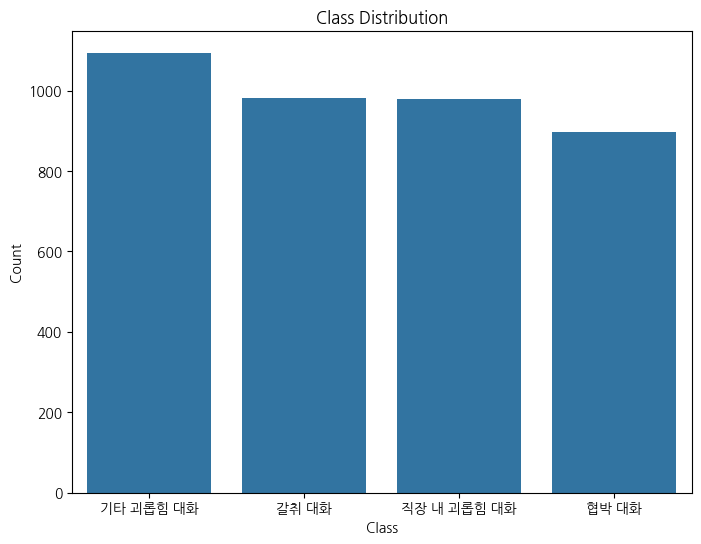

In [ ]:
# 클래스 분포 확인
class_counts = train_data['class'].value_counts()

plt.figure(figsize =(8, 6))
sns.barplot(x = class_counts.index, y = class_counts.values)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
# 평균 클래스별 데이터 개수
np.average(train_data['class'].value_counts())

987.5

### 전체 텍스트 길이 분포 시각화

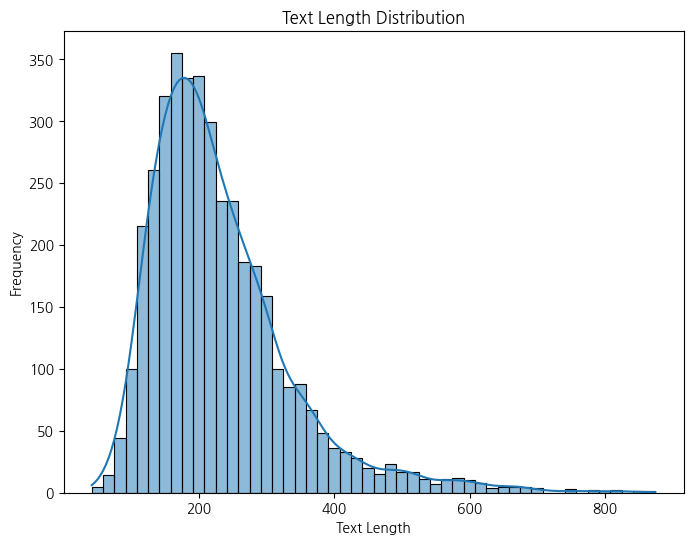

class
갈취 대화          220.639144
기타 괴롭힘 대화      214.817185
직장 내 괴롭힘 대화    242.638407
협박 대화          251.306920
Name: text_length, dtype: float64


In [ ]:
# 텍스트 길이 계산
# 대화 길이 계산 (문자 수 기준)
train_data['text_length'] = train_data['conversation'].apply(len)

# 길이 분포 시각화
plt.figure(figsize=(8, 6))
sns.histplot(train_data['text_length'], bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# 클래스별 평균 텍스트 길이
mean_length_per_class = train_data.groupby('class')['text_length'].mean()
print(mean_length_per_class)

### 클래스별 텍스트 길이 시각화

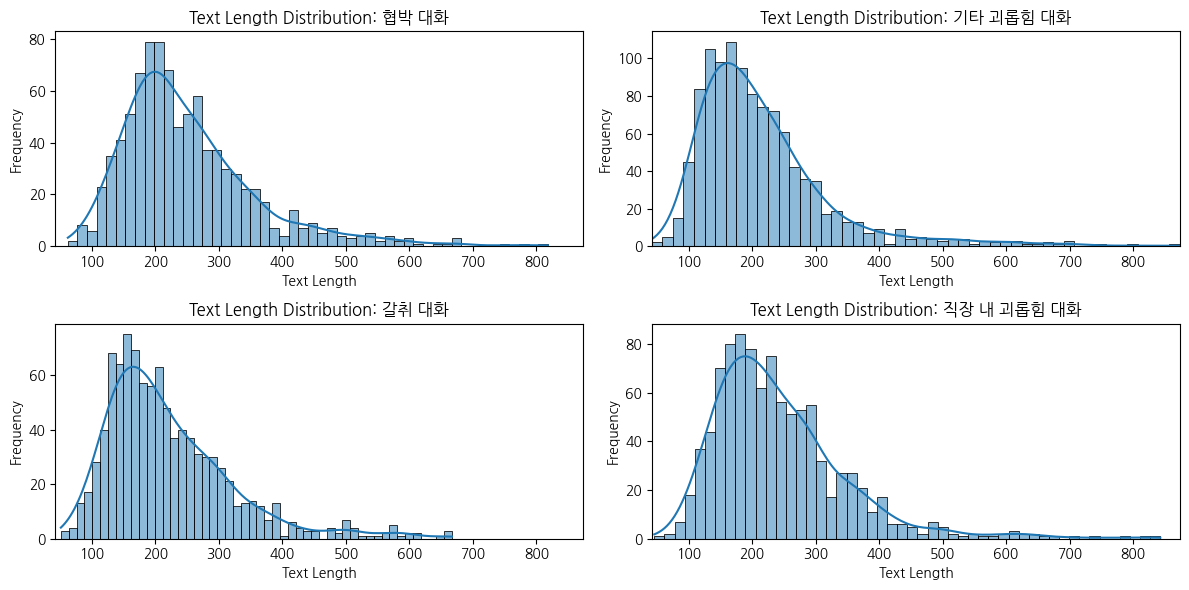

In [ ]:
class_names = [c for c in train_data['class'].unique()]

min_length = train_data['text_length'].min()
max_length = train_data['text_length'].max()

fig, ax = plt.subplots(2, 2, figsize = (12, 6))
ax = ax.flatten()

for i, class_name in enumerate(class_names):
    class_data = train_data[train_data['class'] == class_name]
    sns.histplot(class_data['text_length'], bins = 50, kde = True, ax = ax[i])
    ax[i].set_title(f'Text Length Distribution: {class_name}')
    ax[i].set_xlabel('Text Length')
    ax[i].set_ylabel('Frequency')
    ax[i].set_xlim(min_length, max_length)

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

# 클래스별 단어 빈도 비교

In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 30.6 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
# 한글 폰트 설정
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
nanum_font_paths = [f for f in font_list if 'Nanum' in f]
nanum_font_paths

['/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf']

In [ ]:
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

In [ ]:
# 형태소 분석기 초기화
okt = Okt()

# 불용어 정의 : https://www.ranks.nl/stopwords/korean
stop_words = [
    "아", "휴", "아이구", "아이쿠", "아이고", "어", "나", "우리", "저희", "따라",
    "의해", "을", "를", "에", "의", "가", "으로", "로", "에게", "뿐이다",
    "의거하여", "근거하여", "입각하여", "기준으로", "예하면", "예를 들면", "예를 들자면", "저", "소인", "소생",
    "저희", "지말고", "하지마", "하지마라", "다른", "물론", "또한", "그리고", "비길수 없다", "해서는 안된다",
    "뿐만 아니라", "만이 아니다", "만은 아니다", "막론하고", "관계없이", "그치지 않다", "그러나", "그런데", "하지만", "든간에",
    "논하지 않다", "따지지 않다", "설사", "비록", "더라도", "아니면", "만 못하다", "하는 편이 낫다", "불문하고", "향하여",
    "향해서", "향하다", "쪽으로", "틈타", "이용하여", "타다", "오르다", "제외하고", "이 외에", "이 밖에",
    "하여야", "비로소", "한다면 몰라도", "외에도", "이곳", "여기", "부터", "기점으로", "따라서", "할 생각이다",
    "하려고하다", "이리하여", "그리하여", "그렇게 함으로써", "하지만", "일때", "할때", "앞에서", "중에서", "보는데서",
    "으로써", "로써", "까지", "해야한다", "일것이다", "반드시", "할줄알다", "할수있다", "할수있어", "임에 틀림없다",
    "한다면", "등", "등등", "제", "겨우", "단지", "다만", "할뿐", "딩동", "댕그",
    "대해서", "대하여", "대하면", "훨씬", "얼마나", "얼마만큼", "얼마큼", "남짓", "여", "얼마간",
    "약간", "다소", "좀", "조금", "다수", "몇", "얼마", "지만", "하물며", "또한",
    "그러나", "그렇지만", "하지만", "이외에도", "대해 말하자면", "뿐이다", "다음에", "반대로", "반대로 말하자면", "이와 반대로",
    "바꾸어서 말하면", "바꾸어서 한다면", "만약", "그렇지않으면", "까악", "툭", "딱", "삐걱거리다", "보드득", "비걱거리다",
    "꽈당", "응당", "해야한다", "에 가서", "각", "각각", "여러분", "각종", "각자", "제각기",
    "하도록하다", "와", "과", "그러므로", "그래서", "고로", "한 까닭에", "하기 때문에", "거니와", "이지만",
    "대하여", "관하여", "관한", "과연", "실로", "아니나다를가", "생각한대로", "진짜로", "한적이있다", "하곤하였다",
    "하", "하하", "허허", "아하", "거바", "와", "오", "왜", "어째서", "무엇때문에",
    "어찌", "하겠는가", "무슨", "어디", "어느곳", "더군다나", "하물며", "더욱이는", "어느때", "언제",
    "야", "이봐", "어이", "여보시오", "흐흐", "흥", "휴", "헉헉", "헐떡헐떡", "영차",
    "여차", "어기여차", "끙끙", "아야", "앗", "아야", "콸콸", "졸졸", "좍좍", "뚝뚝",
    "주룩주룩", "솨", "우르르", "그래도", "또", "그리고", "바꾸어말하면", "바꾸어말하자면", "혹은", "혹시",
    "답다", "및", "그에 따르는", "때가 되어", "즉", "지든지", "설령", "가령", "하더라도", "할지라도",
    "일지라도", "지든지", "몇", "거의", "하마터면", "인젠", "이젠", "된바에야", "된이상", "만큼",
    "어찌됏든", "그위에", "게다가", "점에서 보아", "비추어 보아", "고려하면", "하게될것이다", "일것이다", "비교적", "좀",
    "보다더", "비하면", "시키다", "하게하다", "할만하다", "의해서", "연이서", "이어서", "잇따라", "뒤따라",
    "뒤이어", "결국", "의지하여", "기대여", "통하여", "자마자", "더욱더", "불구하고", "얼마든지", "마음대로",
    "주저하지 않고", "곧", "즉시", "바로", "당장", "하자마자", "밖에 안된다", "하면된다", "그래", "그렇지",
    "요컨대", "다시 말하자면", "바꿔 말하면", "즉", "구체적으로", "말하자면", "시작하여", "시초에", "이상", "허",
    "헉", "허걱", "바와같이", "해도좋다", "해도된다", "게다가", "더구나", "하물며", "와르르", "팍",
    "퍽", "펄렁", "동안", "이래", "하고있었다", "이었다", "에서", "로부터", "까지", "예하면",
    "했어요", "해요", "함께", "같이", "더불어", "마저", "마저도", "양자", "모두", "습니다",
    "가까스로", "하려고하다", "즈음하여", "다른", "다른 방면으로", "해봐요", "습니까", "했어요", "말할것도 없고", "무릎쓰고",
    "개의치않고", "하는것만 못하다", "하는것이 낫다", "매", "매번", "들", "모", "어느것", "어느", "로써",
    "갖고말하자면", "어디", "어느쪽", "어느것", "어느해", "어느 년도", "라 해도", "언젠가", "어떤것", "어느것",
    "저기", "저쪽", "저것", "그때", "그럼", "그러면", "요만한걸", "그래", "그때", "저것만큼",
    '너', '내', '네', '거', '해', '것', '이', '해', '안', '말', '뭐', '할'
]

ValueError: 'vividis_r' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

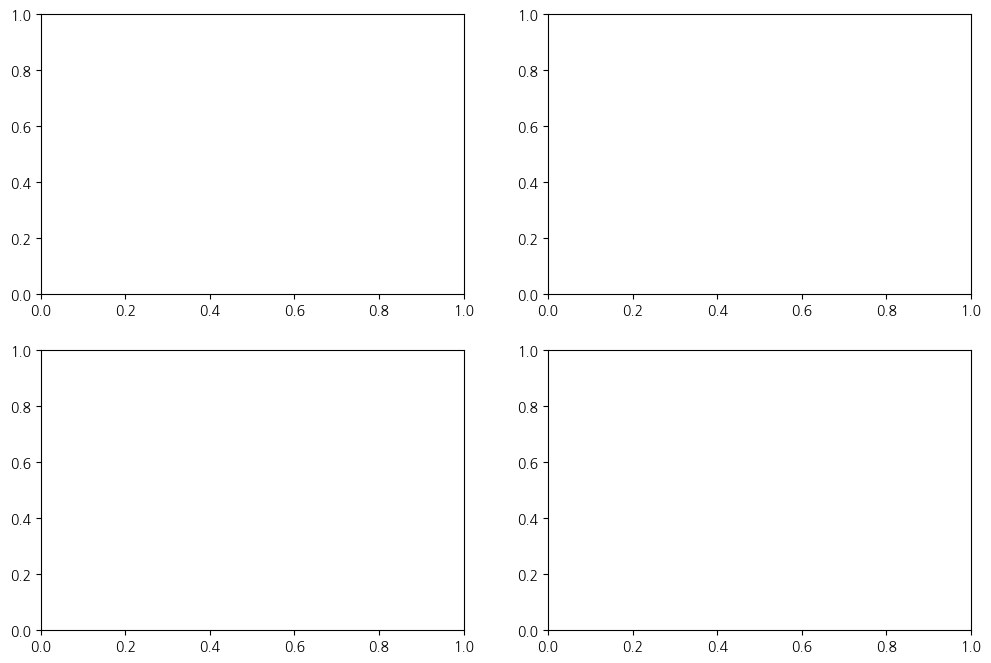

In [ ]:
# 클래스별 wordcloud 생성
class_word_counts = {}

for class_name in class_names:
    class_text = ' '.join(train_data[train_data['class'] == class_name]['conversation'])
    tokens = [word for word, pos in okt.pos(class_text) if pos in {"Noun", "Verb"}] # 명사 및 동사만 추출
    filtered_tokens = [word for word in tokens if word not in stop_words]

    word_counts = Counter(filtered_tokens)
    class_word_counts[class_name] = word_counts

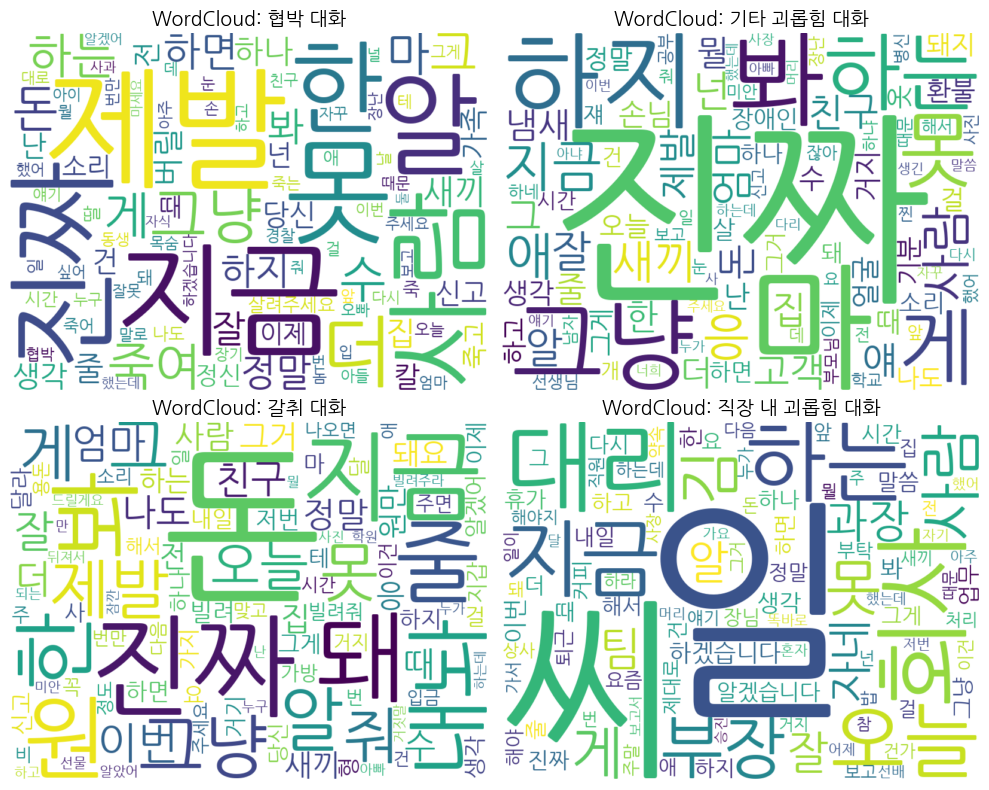

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
ax = ax.flatten()

for i, class_name in enumerate(class_names):
    wordcloud = WordCloud(
        font_path = font_path,
        width = 800, height = 600, background_color = "white",
        colormap = "viridis_r", max_words = 100
    ).generate_from_frequencies(class_word_counts[class_name])

    ax[i].imshow(wordcloud, interpolation = "bilinear")
    ax[i].set_title(f"WordCloud: {class_name}", fontsize = 14)
    ax[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 상위 10개 단어를 출력
for class_name, word_counts in class_word_counts.items():
    print(f"\nClass: {class_name}")
    print("Top 10 Words:")
    print(word_counts.most_common(10))


Class: 협박 대화
Top 10 Words:
[('제발', 461), ('지금', 401), ('못', 347), ('진짜', 345), ('알', 328), ('사람', 304), ('한', 271), ('더', 267), ('그냥', 256), ('죽여', 250)]

Class: 기타 괴롭힘 대화
Top 10 Words:
[('진짜', 479), ('마', 395), ('하지', 345), ('봐', 334), ('그냥', 334), ('하는', 297), ('게', 292), ('못', 280), ('지금', 261), ('사람', 244)]

Class: 갈취 대화
Top 10 Words:
[('돈', 1538), ('진짜', 467), ('돼', 357), ('지금', 352), ('봐', 331), ('줄', 305), ('원', 303), ('내놔', 270), ('한', 257), ('그냥', 254)]

Class: 직장 내 괴롭힘 대화
Top 10 Words:
[('일', 608), ('씨', 543), ('대리', 472), ('회사', 455), ('하는', 396), ('지금', 378), ('오늘', 350), ('부장', 326), ('사람', 282), ('김', 272)]


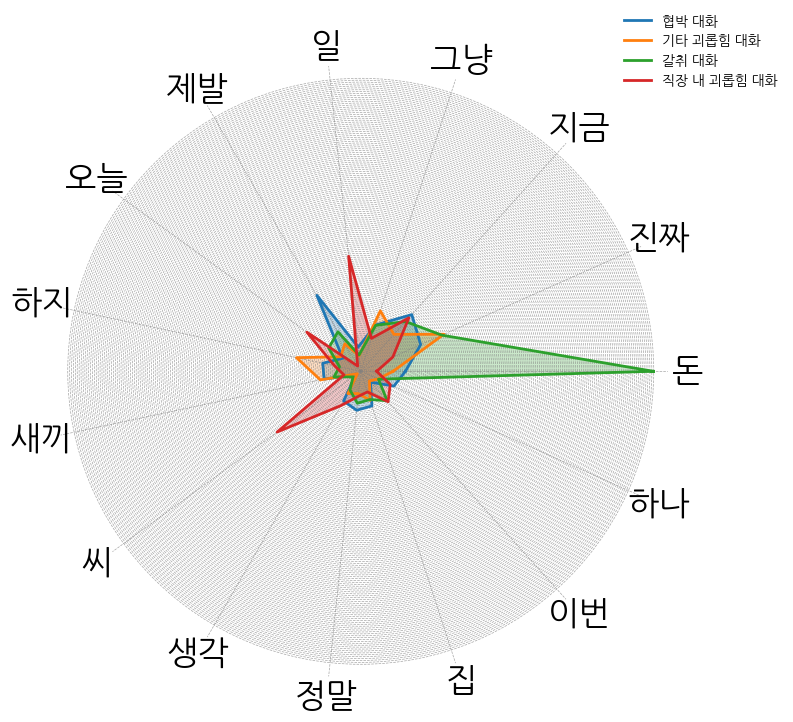

In [ ]:
# 추가 불용어
stop_words_add = set(['하는', '게', '사람', '알', '한', '잘', '봐', '못', '그', '줄', '더', '마', '수', '돼', '하면', '때'])

# 전체 데이터 단어 빈도 확인하기
all_words = set(word for freq_dict in class_word_counts.values() for word in freq_dict if word not in stop_words_add)
top_words = Counter({word: sum(freq.get(word, 0) for freq in class_word_counts.values()) for word in all_words})
top_words = [word for word, _ in top_words.most_common(15)]

# 클래스별 단어 빈도 데이터 정리
freq_matrix = {cls: [class_word_counts[cls].get(word, 0) for word in top_words] for cls in class_word_counts}

# 데이터프레임 생성
freq_df = pd.DataFrame(freq_matrix, index=top_words)

# 레이더 차트 그리기 (가독성 개선)
angles = np.linspace(0, 2 * np.pi, len(top_words), endpoint=False).tolist()
angles += angles[:1]  # 폐곡선 만들기

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 데이터값 최소값 설정
min_value = 1

for cls in freq_df.columns:
    values = freq_df[cls].replace(0, min_value).tolist()  # 0 값을 최소값으로 대체
    values += values[:1]  # 폐곡선 만들기
    ax.plot(angles, values, label=cls, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

# 축선 스타일 조정
ax.spines['polar'].set_visible(False)
ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

# 축 라벨
ax.set_xticks(angles[:-1])
ax.set_xticklabels(top_words, fontsize=24, rotation=45, ha='center')

# Y축 라벨 설정
ax.set_yticks(range(0, max(freq_df.max().max() + 10, 50), 10))  # 10 단위로 표시
ax.set_yticklabels([], color="gray", fontsize=8)  # Y축 숫자 비활성화

# 그래프 제목과 범례
#ax.set_title("클래스별 특정 단어 사용 빈도", fontsize=16, pad=20, color="darkred")
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10, frameon=False)

plt.tight_layout()
plt.show()

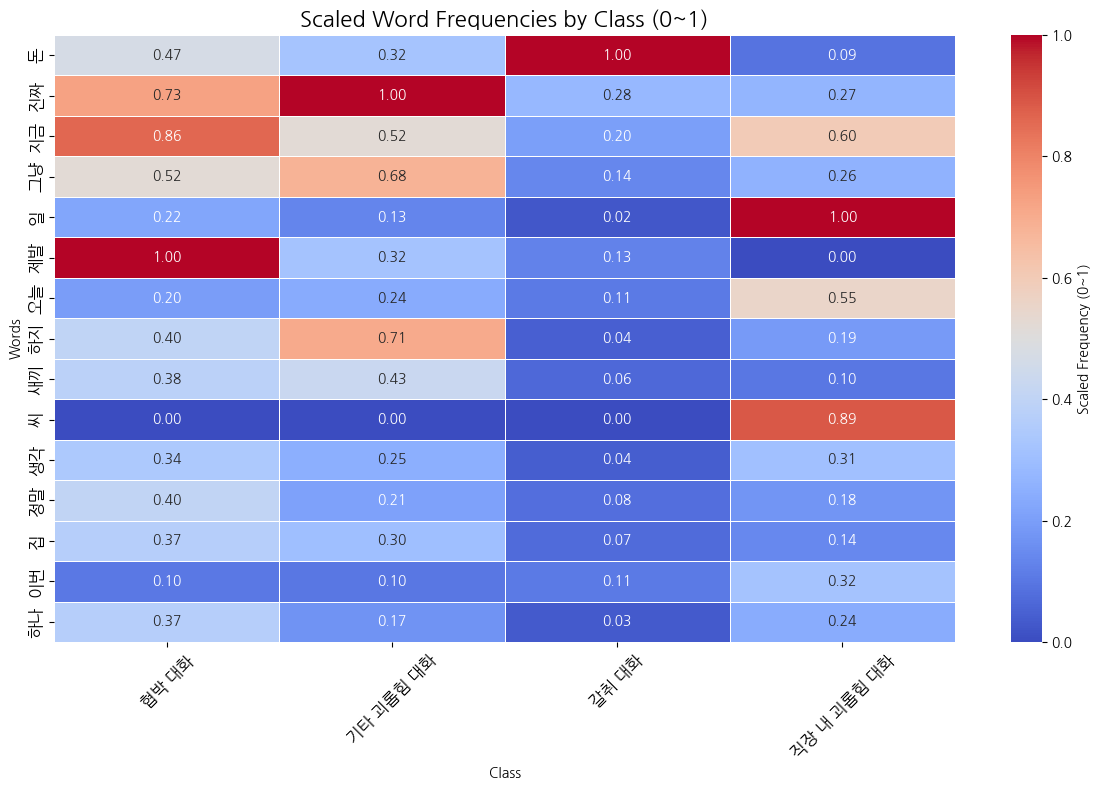

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling으로 클래스별 단어 빈도 정규화
scaler = MinMaxScaler()

# freq_df 값 정규화 (각 클래스별 정규화)
scaled_freq_df = pd.DataFrame(
    scaler.fit_transform(freq_df),
    index=freq_df.index,  # 단어
    columns=freq_df.columns  # 클래스
)

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(
    scaled_freq_df,  # 정규화된 데이터 사용
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Scaled Frequency (0~1)'}
)
plt.title("Scaled Word Frequencies by Class (0~1)", fontsize=16)
plt.xlabel("Class")
plt.ylabel("Words")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()